In [11]:
import numpy as np 
import matplotlib.pyplot as plt 
from pylops.utils.seismicevents import makeaxis, linear2d
from pylops.utils.wavelets import ricker
import random

In [119]:
par = {'ox':0, 'dx':12.5, 'nx':501, # offsets
       'ot':0, 'dt':0.004, 'nt':501, # time
       'f0': 10, 'nfmax': 50} 

In [120]:
# Make canvas
t, t2, x, y = makeaxis(par)

In [121]:
# Make wavelet
wav = ricker(np.arange(41) * par['dt'],f0=par['f0'])[0]

In [122]:
[random.uniform(t.min(),t.max())*0.8,random.uniform(t.min(),t.max())*0.8]

[1.3992235919122962, 1.441797054035917]

In [123]:
v = 1500
t0 = [random.uniform(t.min(),t.max())*0.8, random.uniform(t.min(),t.max())*0.8, random.uniform(t.min(),t.max())*0.8]
theta = [random.uniform(-70,70),random.uniform(-70,70),random.uniform(-70,70)]
amp = [random.uniform(-2,2), random.uniform(-2,2), random.uniform(-2,2)]

mlin, mlinwav = linear2d(x, t, v, t0,theta, amp, wav)

In [124]:
noise = np.random.normal(loc=0,scale=1.0,size=mlinwav.shape)*0.5

signal = mlinwav

noisy_signal = noise+mlinwav

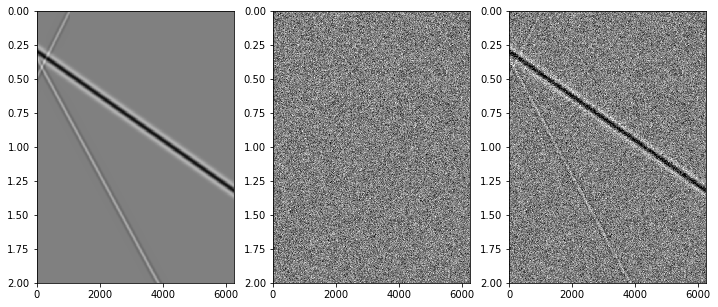

In [125]:
fig, axs = plt.subplots(1, 3, figsize=(12, 5))
axs[0].imshow(mlinwav.T, aspect='auto', interpolation='nearest',
              vmin=-2, vmax=2, cmap='gray',
              extent=(x.min(), x.max(), t.max(), t.min()))
axs[1].imshow(noise.T, aspect='auto', interpolation='nearest',
              vmin=-2, vmax=2, cmap='gray',
              extent=(x.min(), x.max(), t.max(), t.min()))
axs[2].imshow(noisy_signal.T, aspect='auto', interpolation='nearest',
              vmin=-2, vmax=2, cmap='gray',
              extent=(x.min(), x.max(), t.max(), t.min()))
